KHẢO SÁT MỨC LƯƠNG DỰA VÀO SẮC TỘC VÀ QUỐC GIA

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

filePath = "C:/Users/DELL/Downloads/archive/Salary_Data_Based_country_and_race.csv"
df = pd.read_csv(filePath)
df

# mức lương trung bình theo số năm kinh nghiệm 
# range exp (1 đến 3, 4 đến 7, 8 đến 11, 11 trở lên)
# mối tương qua giữa age và exp
# biểu đồ phân bố 

# job title: tạo dictionary, lọc bằng tay các nhóm ngành, mức lương trung bình của các nhóm ngành (DONE)
# phân bố số năm kinh nghiệm 
# NHỚ KIỂM TRA DUPLICATE (done)
# PHÂN BỐ GIỚI TÍNH THEO TRÌNH ĐỘ HỌC VẤN (done)



,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [9]:
df = df.rename(columns={'Unnamed: 0': 'Index'})
df

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [10]:
# check duplicate sau khi fix education

duplicate_rows =df.duplicated()
duplicate_data = df[duplicate_rows]
num_duplicate = duplicate_data.shape[0]

print(duplicate_rows)
print(num_duplicate)


0       False
1       False
2       False
3       False
4       False
        ...  
6699    False
6700    False
6701    False
6702    False
6703    False
Length: 6704, dtype: bool
0


In [3]:
df.info()
# salary có số data non null khác với những cột khác -> tồn tại NaN data
# số lượng ít -> bỏ cũng không ảnh hưởng đến kết quả chung 

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [4]:
def case_when(*args):
    return np.select(
        condlist = args[::2],
        choicelist = args[1::2],
        default=pd.NA
    )

df['Education Level Fix'] = case_when(df['Education Level'] == "Bachelor's","Bachelor's Degree",
                                       df['Education Level']=="Bachelor's Degree","Bachelor's Degree",
                                       df['Education Level'] == "Master's","Master's Degree",
                                       df['Education Level'] == "Master's Degree","Master's Degree",
                                       df['Education Level'] == "phD","PhD",
                                       df['Education Level'] == "PhD","PhD",
                                       df['Education Level'] == "High School","High School")

In [8]:
df.head(5)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Education Level Fix
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White,Bachelor's Degree
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,Master's Degree
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,PhD
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic,Bachelor's Degree
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian,Master's Degree


In [5]:
Data = df.dropna()
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6698 non-null   int64  
 1   Age                  6698 non-null   float64
 2   Gender               6698 non-null   object 
 3   Education Level      6698 non-null   object 
 4   Job Title            6698 non-null   object 
 5   Years of Experience  6698 non-null   float64
 6   Salary               6698 non-null   float64
 7   Country              6698 non-null   object 
 8   Race                 6698 non-null   object 
 9   Education Level Fix  6698 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 575.6+ KB


In [6]:
Data.describe(include="all")
# gender = (3671/6698)*100
# gender

# edu = (2265/6698)*100
# edu

# job = (518/6698)*100
# job

# country = (1359/6698)*100
# country

# race = (1962/6698)*100
# race

# bảng trên có số liệu độ tuổi từ 21 đến 62 tuổi
# Đa số người tham gia khảo sát là nam chiếm 54,8%
# Đa số người có có bằng cử nhân chiếm 33,8%
# Công việc phổ biến nhất là software engineer chiếm 7,7%
# Trung bình năm làm việc là 8
# Phần lớn đến từ Mỹ chiếm 20,2% và là người da trắng chiếm 29.3%



,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Education Level Fix
count,6698.000000,6698.000000,6698,6698,6698,6698.000000,6698.000000,6698,6698,6698
unique,NaN,NaN,3,7,191,NaN,NaN,5,10,4
top,NaN,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN,USA,White,Bachelor's Degree
freq,NaN,NaN,3671,2265,518,NaN,NaN,1359,1962,3021
mean,3351.922216,33.623022,NaN,NaN,NaN,8.095178,115329.253061,NaN,NaN,NaN
std,1934.949414,7.615784,NaN,NaN,NaN,6.060291,52789.792507,NaN,NaN,NaN
min,0.000000,21.000000,NaN,NaN,NaN,0.000000,350.000000,NaN,NaN,NaN
25%,1676.250000,28.000000,NaN,NaN,NaN,3.000000,70000.000000,NaN,NaN,NaN
50%,3352.500000,32.000000,NaN,NaN,NaN,7.000000,115000.000000,NaN,NaN,NaN
75%,5026.750000,38.000000,NaN,NaN,NaN,12.000000,160000.000000,NaN,NaN,NaN


Text(0.5, 1.0, 'Phân bố lương theo sắc tộc')

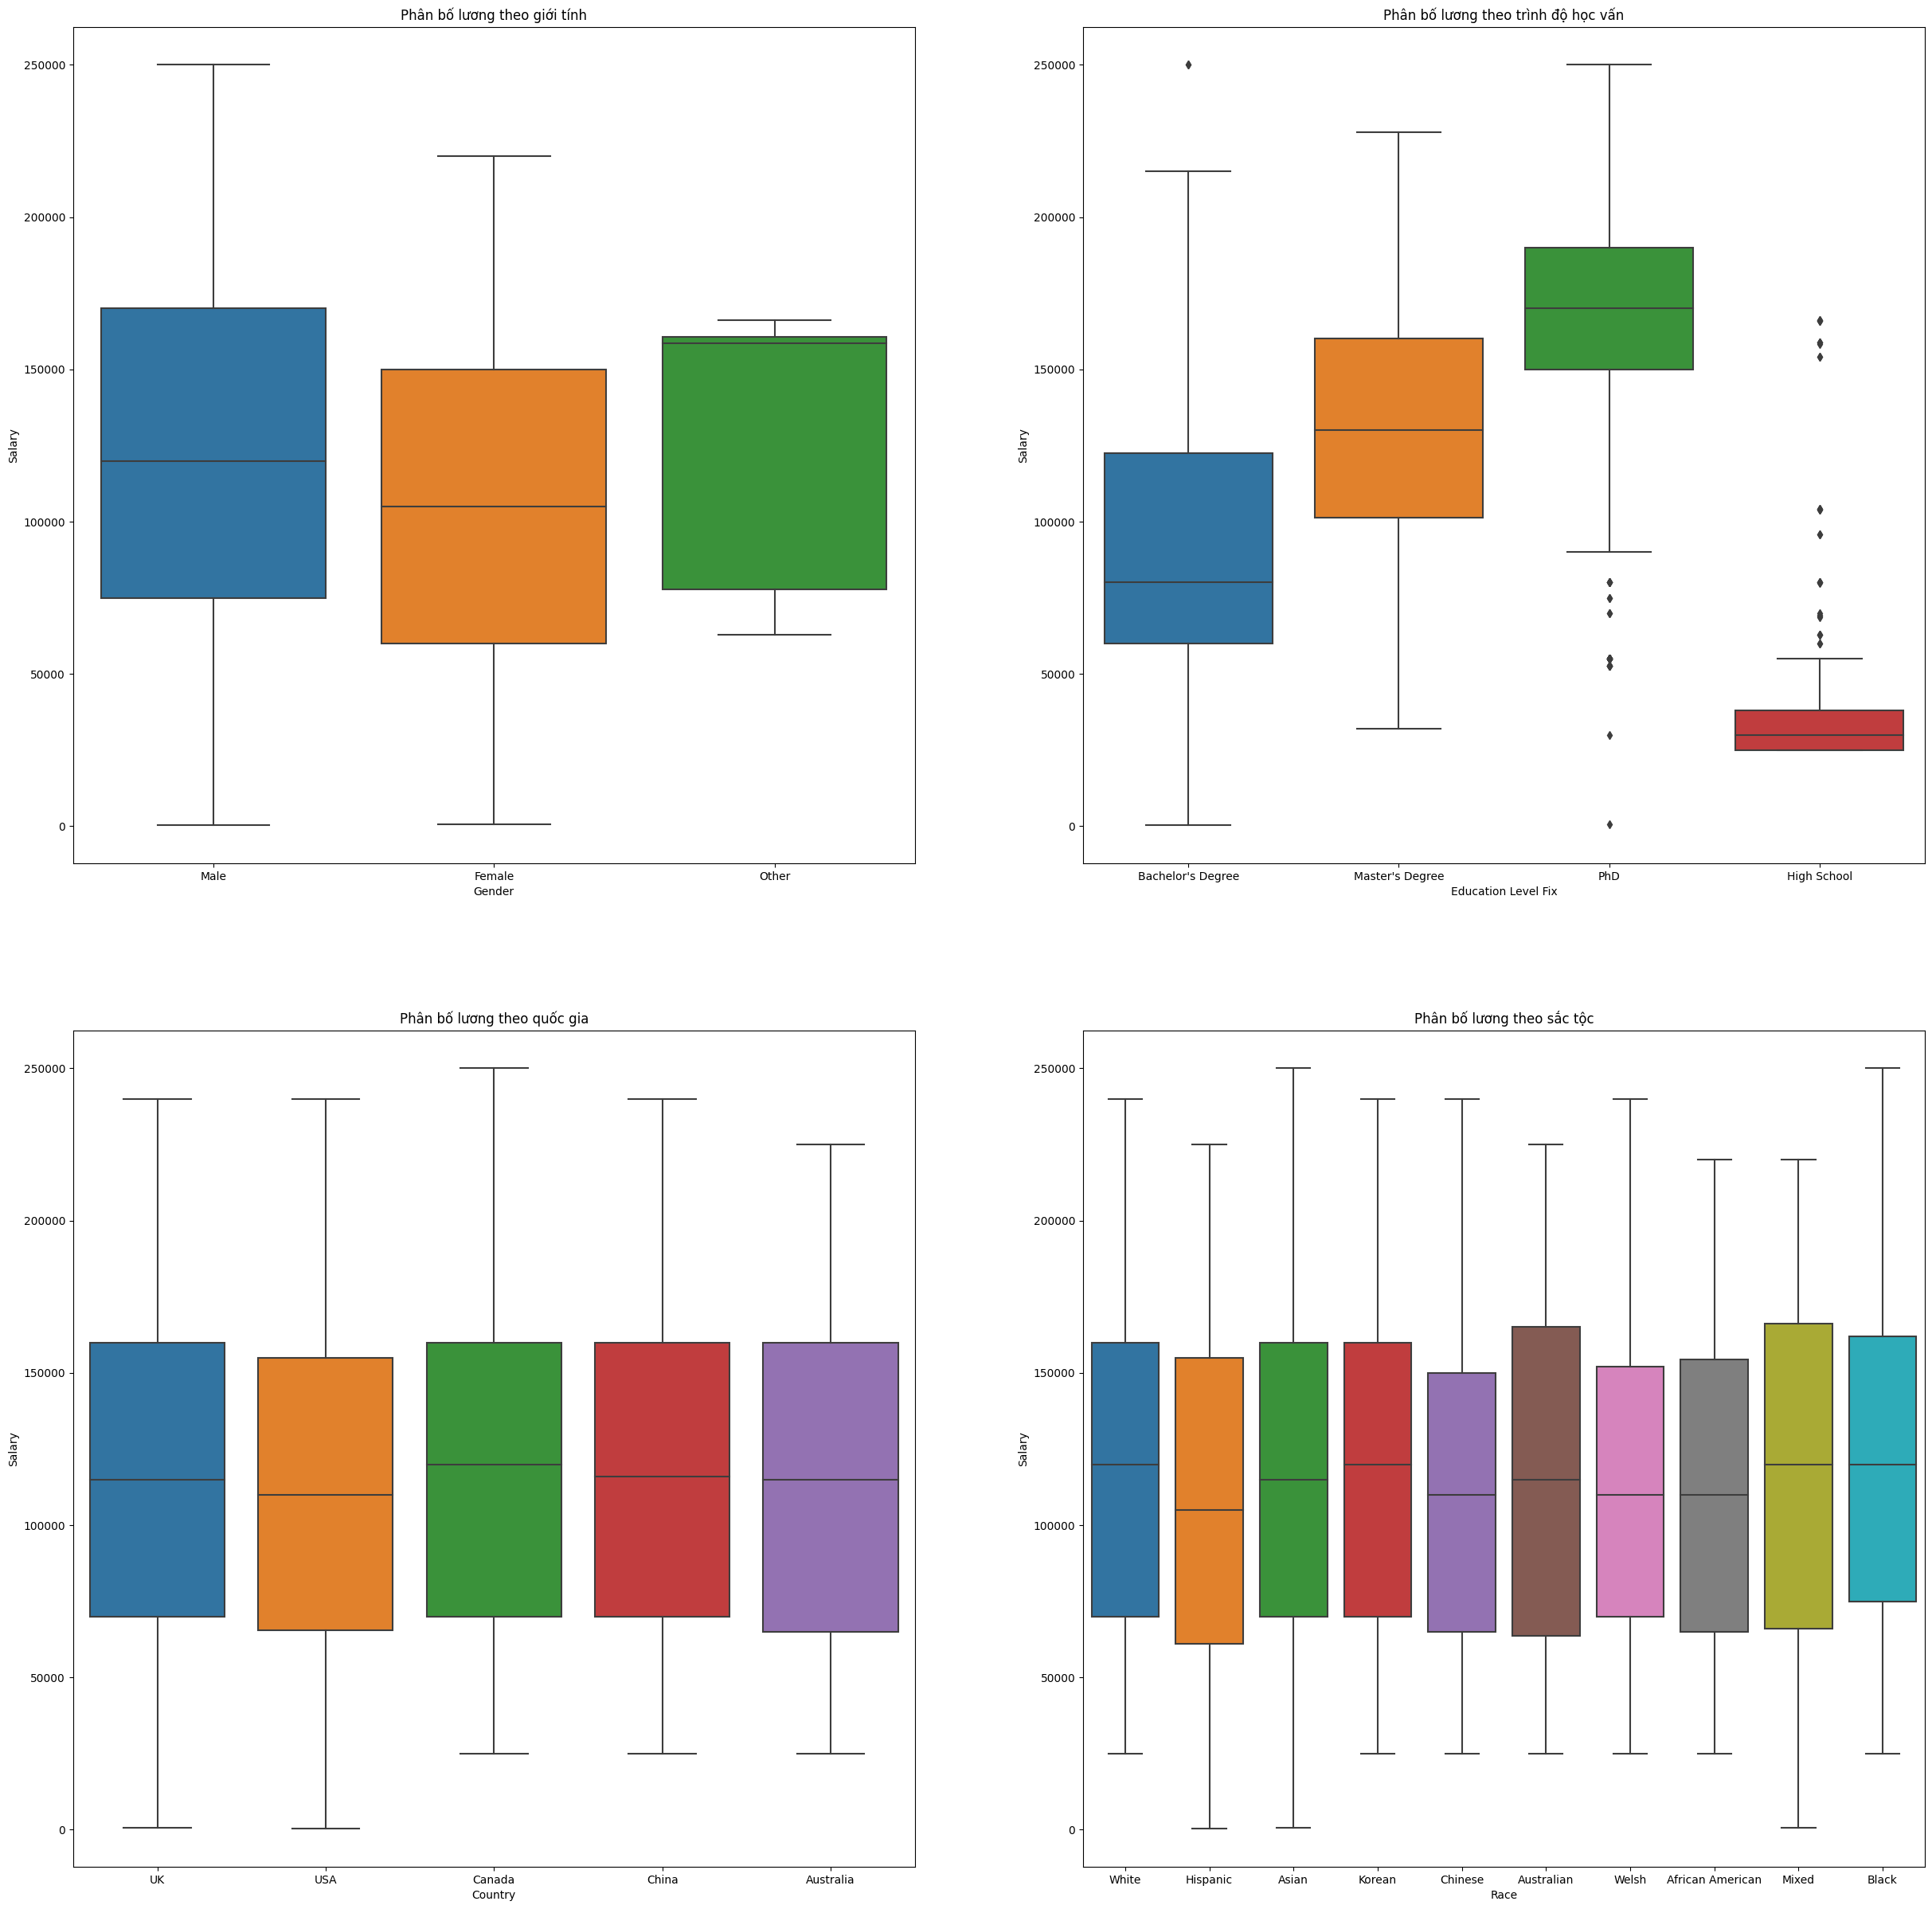

In [7]:
plt.figure(figsize = (30,30),dpi=100)

# lương theo giới tính
plt.subplot(2,2,1)
sns.boxplot(data=df,x="Gender",y="Salary")
plt.title("Phân bố lương theo giới tính")

# lương theo trình độ học vấn
plt.subplot(2,2,2)
sns.boxplot(data=Data, x="Education Level Fix", y="Salary")
plt.title('Phân bố lương theo trình độ học vấn')

# lương theo Quốc gia
plt.subplot(2,2,3)
sns.boxplot(data=df,x="Country",y="Salary")
plt.title("Phân bố lương theo quốc gia")

#lương theo sắc tộc
plt.subplot(2,2,4)
sns.boxplot(data=df,x="Race",y="Salary")
plt.title("Phân bố lương theo sắc tộc")

Text(0.5, 1.0, 'Biểu đồ tương quan giữa tuổi và mức lương')

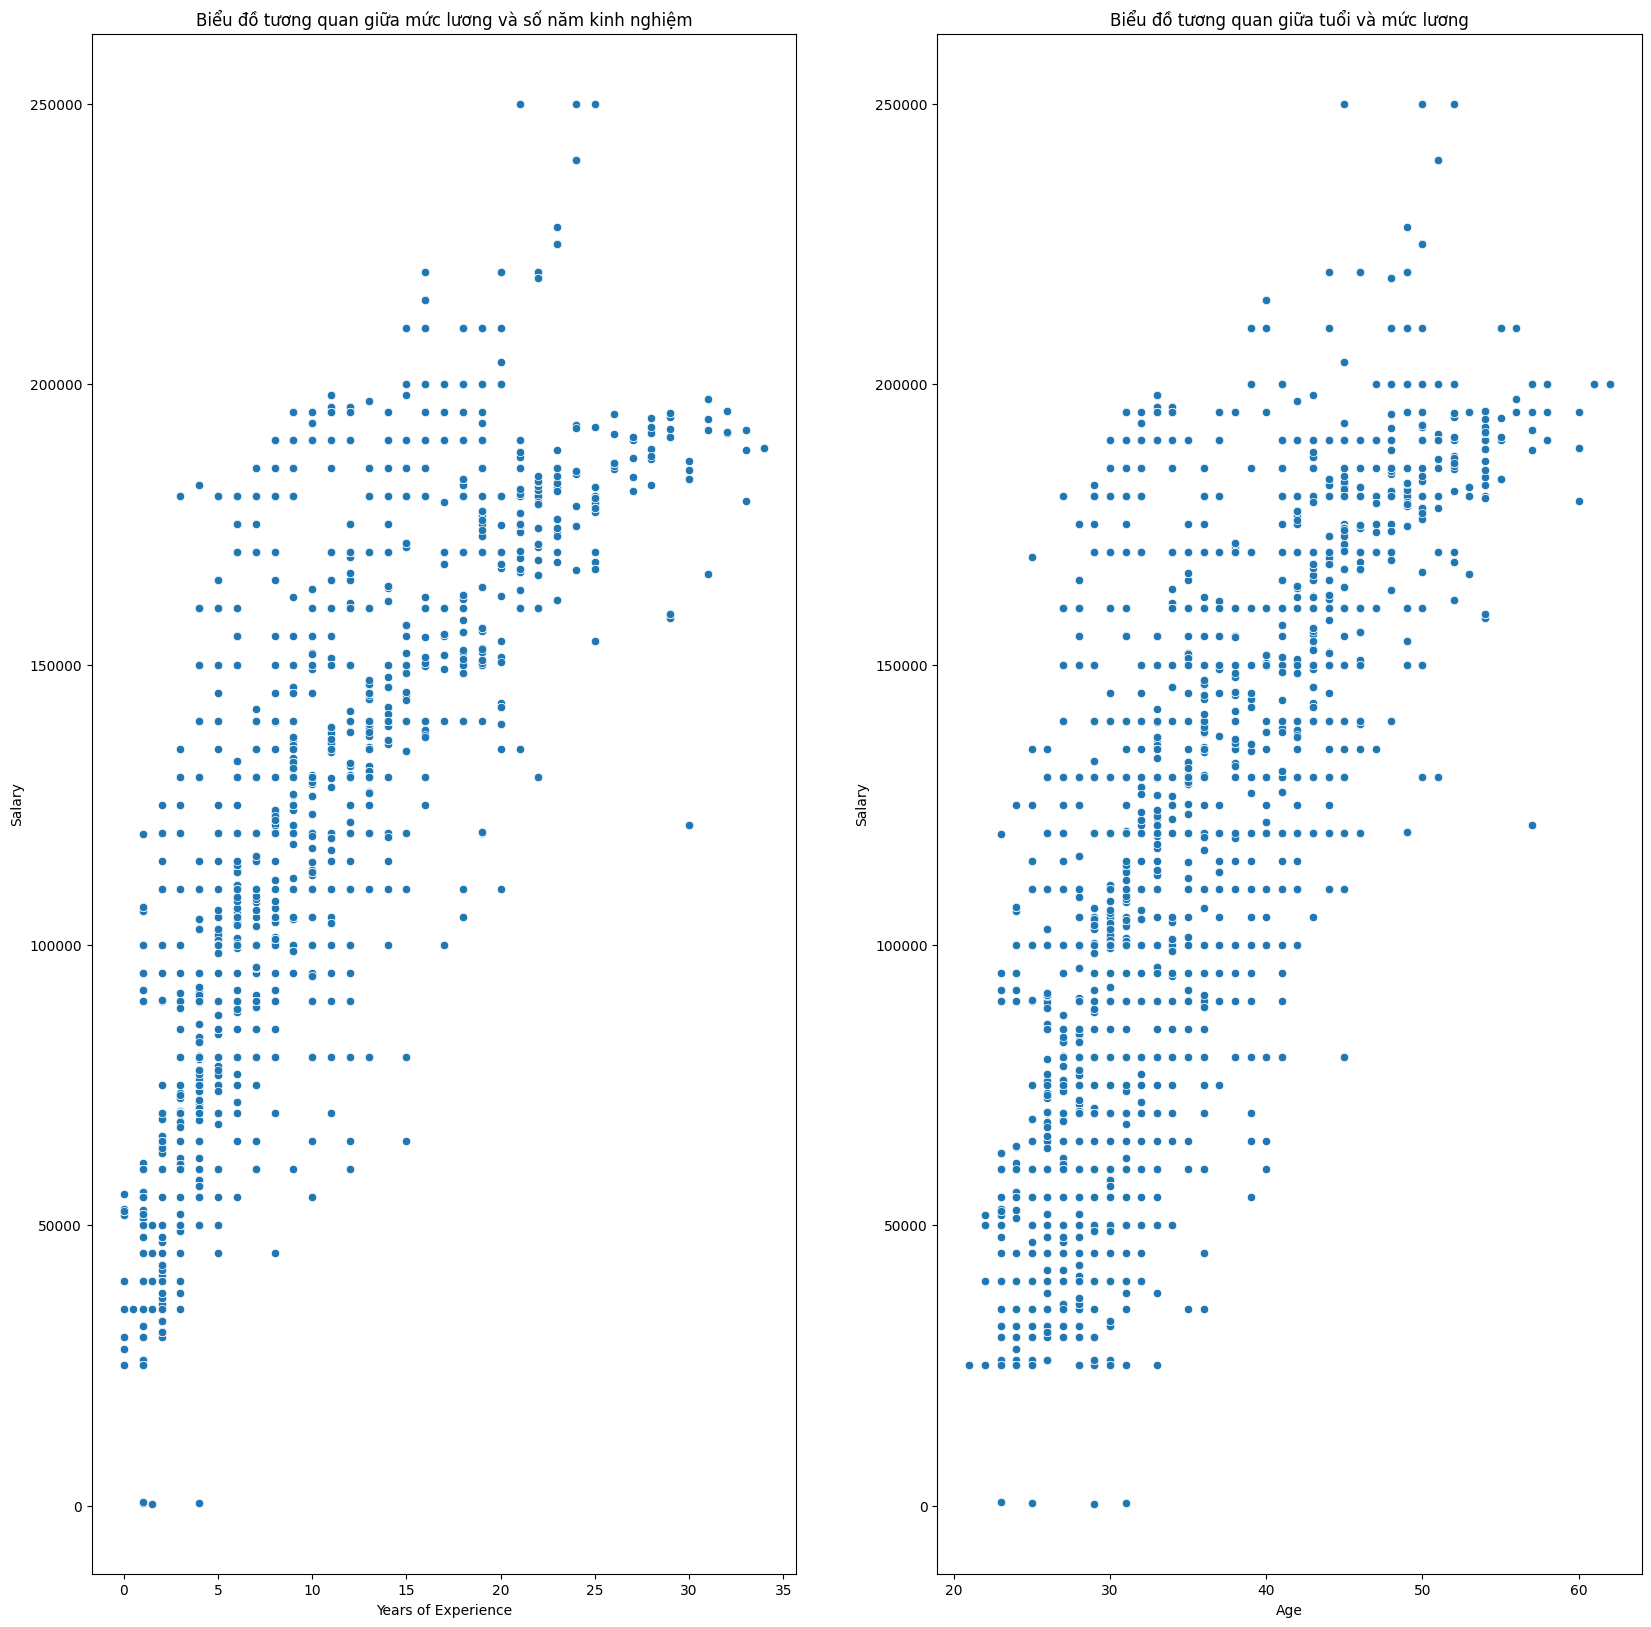

In [13]:
plt.figure(figsize=(20,20),dpi=100)
# phân bố lương theo số năm kinh nghiệm
plt.subplot(1,2,1)
sns.scatterplot(data=df,x="Years of Experience",y="Salary")
plt.title("Biểu đồ tương quan giữa mức lương và số năm kinh nghiệm")

# phân bố lương theo số tuổi
plt.subplot(1,2,2)
sns.scatterplot(data=df,x="Age",y="Salary")
plt.title("Biểu đồ tương quan giữa tuổi và mức lương")


Text(0.5, 1.0, 'Ma trận tương quan giữa tuổi, lương và số năm kinh nghiệm')

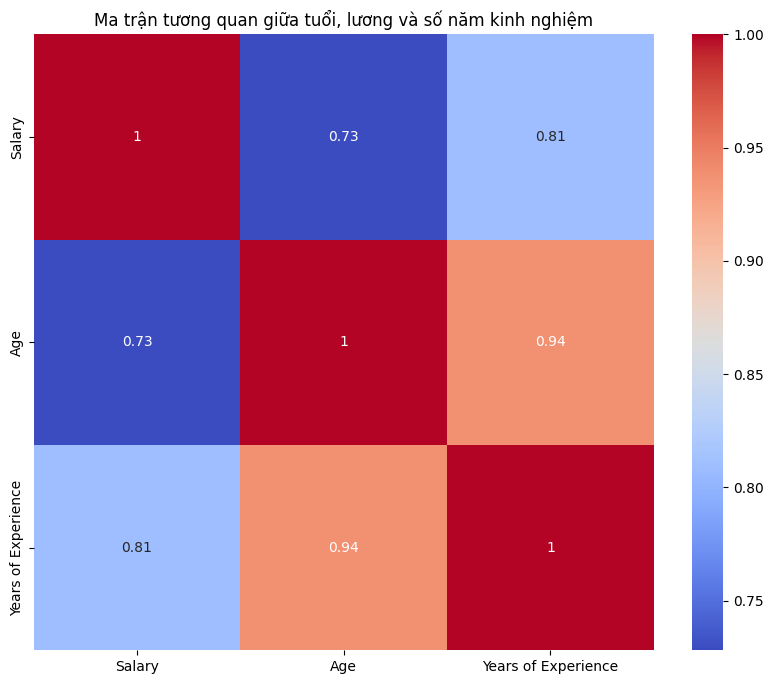

In [9]:
# ma trận tương quan giữa tuổi, lương và kinh nghiệm
plt.figure(figsize=(10,8))
metric = df[["Salary","Age","Years of Experience"]]
sns.heatmap(metric.corr(),annot=True,cmap="coolwarm")
plt.title("Ma trận tương quan giữa tuổi, lương và số năm kinh nghiệm")

In [10]:
Data["Education Level Fix"].value_counts()

Education Level Fix
Bachelor's Degree    3021
Master's Degree      1860
PhD                  1369
High School           448
Name: count, dtype: int64

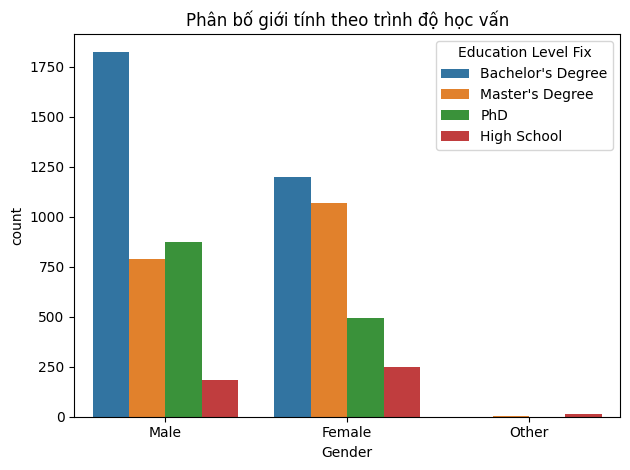

In [11]:
plt.figure(dpi=100)

# Phân bố giới tính theo trình độ học vấn
sns.countplot(data=Data, x="Gender", hue="Education Level Fix")
plt.title("Phân bố giới tính theo trình độ học vấn")
plt.tight_layout() 
plt.show()

In [12]:
df["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

MỨC LƯƠNG TRUNG BÌNH THEO NHÓM NGÀNH

In [17]:
# LỌC NHÓM NGÀNH
dict_jobIndustry ={
    "ENGINEER": ['Software Engineer','Data Analyst','Software Developer','Senior Engineer','Data Entry Clerk','Business Analyst','IT Support','Software Manager',
           'Junior Developer','Data Scientist','Technical Writer','Project Engineer','UX Designer','Network Engineer','Business Intelligence Analyst','Graphic Designer',
           'UX Researcher','Senior Data Scientist','IT Manager','Web Developer','Senior Software Engineer'],
    "FINANCE":['Sales Associate','Product Manager','Sales Manager', 'Marketing Coordinator','Project Manager','Operations Manager', 'Marketing Manager','Data Entry Clerk', 'Sales Director',
               'Financial Manager','Senior Consultant', 'Product Designer','Marketing Specialist','Sales Executive','Operations Director','Administrative Assistant',
              'Strategy Consultant','Account Manager','Director of Marketing', 'Help Desk Analyst','Business Intelligence Analyst','Junior Accountant',
              'Digital Marketing Manager','Business Development Manager','Junior Sales Associate','Digital Marketing Specialist', 'Receptionist',
              'Marketing Director'],
       "HUMAN RESOURCE":['HR Manager','Customer Service Rep','Recruiter','Customer Success Rep','HR Generalist','Customer Service Manager','Customer Service Representative',
                         'Juniour HR Generalist',],
       "OTHER":['Director','CEO','Senior Scientist','Creative Director','Social Media Man','Delivery Driver']    
}

In [18]:
# TẠO DICTIONARY CHO CÁC NGÀNH VÀ LƯƠNG CỦA TỪNG NGÀNH
job_salary_dict = df.set_index("Job Title")["Salary"].to_dict()

print(job_salary_dict)

{'Software Engineer': 80000.0, 'Data Analyst': 120000.0, 'Senior Manager': 170000.0, 'Sales Associate': 50000.0, 'Director': 200000.0, 'Marketing Analyst': 75000.0, 'Product Manager': 120000.0, 'Sales Manager': 140000.0, 'Marketing Coordinator': 95000.0, 'Senior Scientist': 140000.0, 'Software Developer': 61000.0, 'HR Manager': 80000.0, 'Financial Analyst': 95000.0, 'Project Manager': 115000.0, 'Customer Service Rep': 40000.0, 'Operations Manager': 119000.0, 'Marketing Manager': 140000.0, 'Senior Engineer': 140000.0, 'Data Entry Clerk': 35000.0, 'Sales Director': 90000.0, 'Business Analyst': 75000.0, 'VP of Operations': 190000.0, 'IT Support': 50000.0, 'Recruiter': 70000.0, 'Financial Manager': 55000.0, 'Social Media Specialist': 45000.0, 'Software Manager': 110000.0, 'Junior Developer': 40000.0, 'Senior Consultant': 140000.0, 'Product Designer': 55000.0, 'CEO': 250000.0, 'Accountant': 55000.0, 'Data Scientist': 145000.0, 'Marketing Specialist': 65000.0, 'Technical Writer': 45000.0, 'H

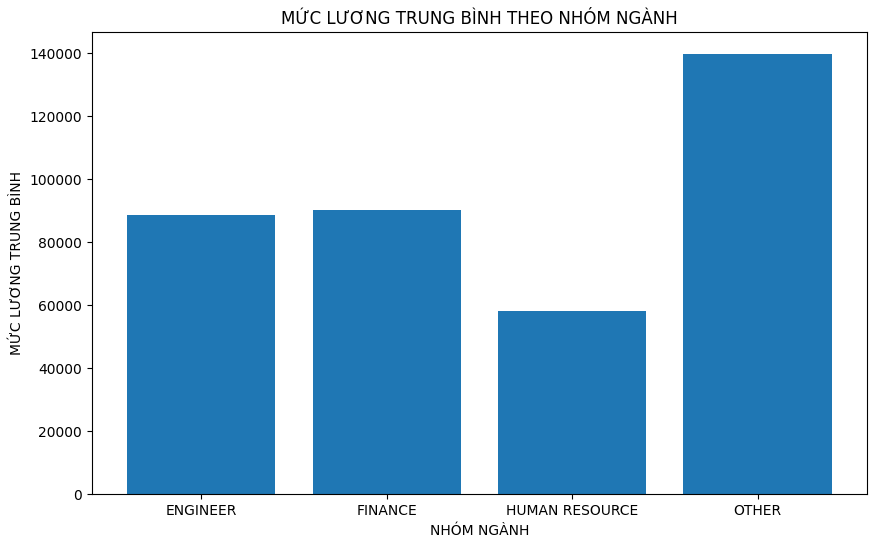

In [19]:
# TẠO DICT RỖNG: LƯƠNG TRUNG BÌNH CHO TỪNG NGÀNH
average_salary_by_category = {}

# TÍNH MỨC LƯƠNG TRUNG BÌNH CHO TỪNG NHÓM NGÀNH
for category, job_titles in dict_jobIndustry.items():
    total_salary = sum(job_salary_dict.get(job_title, 0) for job_title in job_titles)
    average_salary = total_salary / len(job_titles) if len(job_titles) > 0 else 0
    average_salary_by_category[category] = average_salary

# TẠO DATAFRAME VÀ VẼ DỒ THỊ
average_salary_df = pd.DataFrame(list(average_salary_by_category.items()), columns=["Category", "Average Salary"])

plt.figure(figsize=(10, 6))
plt.bar(average_salary_df["Category"], average_salary_df["Average Salary"])
plt.xlabel("NHÓM NGÀNH")
plt.ylabel("MỨC LƯƠNG TRUNG BÌNH")
plt.title("MỨC LƯƠNG TRUNG BÌNH THEO NHÓM NGÀNH")
plt.show()


MỨC LƯƠNG TRUNG BÌNH THEO NHÓM SỐ NĂM KINH NGHIỆM


In [20]:
job_salary_dict = Data.set_index("Years of Experience")["Salary"].to_dict()

print(job_salary_dict)

{5.0: 70000.0, 3.0: 50000.0, 15.0: 150000.0, 7.0: 90000.0, 20.0: 200000.0, 2.0: 40000.0, 12.0: 120000.0, 4.0: 55000.0, 1.0: 35000.0, 10.0: 100000.0, 18.0: 180000.0, 6.0: 75000.0, 14.0: 140000.0, 16.0: 160000.0, 0.0: 25000.0, 22.0: 219000.0, 19.0: 190000.0, 9.0: 95000.0, 13.0: 130000.0, 11.0: 110000.0, 25.0: 179756.0, 21.0: 250000.0, 8.0: 80000.0, 17.0: 170000.0, 23.0: 228000.0, 24.0: 240000.0, 0.5: 35000.0, 1.5: 35000.0, 31.0: 197354.0, 30.0: 184660.0, 28.0: 182013.0, 33.0: 188232.0, 27.0: 186794.0, 34.0: 188651.0, 29.0: 194778.0, 26.0: 194638.0, 32.0: 191510.0}


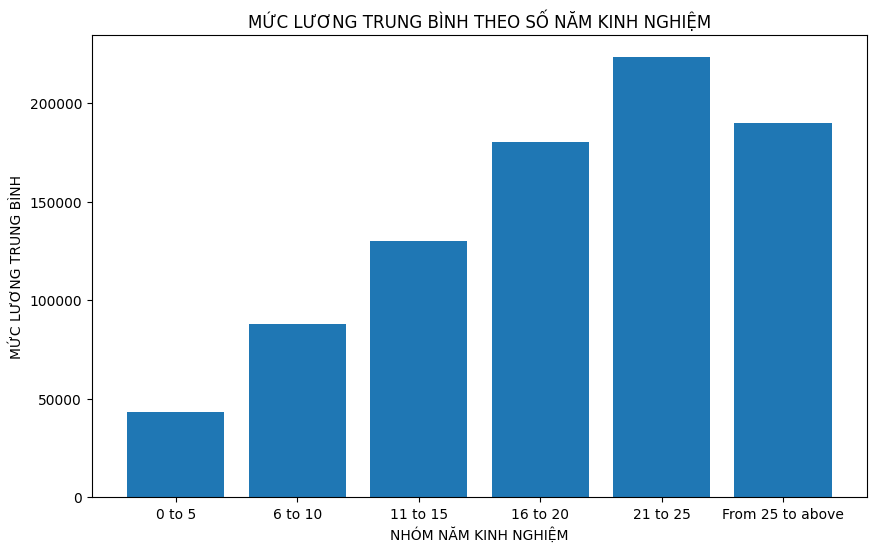

In [28]:
# tạo dict tính số lương trung bình theo nhóm năm kinh nghiệm
# phần tử một chứa tổng số lương
# phần tử 2 chứa biến đếm số người có exp phù hợp trong dataframe
experience_salary_count = {
    "0 to 5": [0, 0],
    "6 to 10": [0, 0],
    "11 to 15": [0, 0],
    "16 to 20": [0, 0],
    "21 to 25": [0, 0],
    "From 25 to above": [0, 0]
}

for exp, sal in job_salary_dict.items():
    if exp >= 0 and exp <= 5:
        experience_salary_count["0 to 5"][0] += sal
        experience_salary_count["0 to 5"][1] += 1
    elif exp > 5 and exp <= 10:
        experience_salary_count["6 to 10"][0] += sal
        experience_salary_count["6 to 10"][1] += 1
    elif exp > 10 and exp <= 15:
        experience_salary_count["11 to 15"][0] += sal
        experience_salary_count["11 to 15"][1] += 1
    elif exp > 15 and exp <= 20:
        experience_salary_count["16 to 20"][0] += sal
        experience_salary_count["16 to 20"][1] += 1
    elif exp > 20 and exp <= 25:
        experience_salary_count["21 to 25"][0] += sal
        experience_salary_count["21 to 25"][1] += 1
    else:
        experience_salary_count["From 25 to above"][0] += sal
        experience_salary_count["From 25 to above"][1] += 1


# tạo một list mới chỉ để chứa group và mức lương trung bình tương ứng
data_list = []
for group, (total_sal, count) in experience_salary_count.items():
    if count > 0:
        average_salary = total_sal / count
        data_list.append({"Group": group, "Average Salary": average_salary})
    else:
        data_list.append({"Group": group, "Average Salary": None})


# tạo dataframe và vẽ biểu đồ
df_result = pd.DataFrame(data_list)

plt.figure(figsize=(10, 6))
plt.bar(df_result["Group"], df_result["Average Salary"])
plt.xlabel("NHÓM NĂM KINH NGHIỆM")
plt.ylabel("MỨC LƯƠNG TRUNG BÌNH")
plt.title("MỨC LƯƠNG TRUNG BÌNH THEO SỐ NĂM KINH NGHIỆM")

plt.show()
